# Carteira Recomendada Mensal Nova Futura Investimentos 2022

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
tickers = {
    'Janeiro': {
        'BBDC4': .1,
        'GGBR4': .1,
        'IVVB11': .15,
        'JBSS3': .1,
        'MGLU3': .1,
        'PRIO3': .1,
        'RAIL3': .05,
        'SLCE3': .1,
        'TAEE11': .05,
        'VALE3': .15
    },
    'Fevereiro': {
        'BBDC4': .1,
        'BPAC11': .1,
        'GGBR4': .1,
        'JBSS3': .1,
        'JHSF3': .075,
        'RENT3': .075,
        'PRIO3': .125,
        'SLCE3': .1,
        'VALE3': .125,
        'WEGE3': .1
    },
    'Março': {
        'BBDC4': .1,
        'PRIO3': .15,
        'SLCE3': .1,
        'VALE3': .125,
        'BPAC11': .075,
        'JBSS3': .1,
        'JHSF3': .075,
        'PCAR3': .075,
        'RDOR3': .1,
        'CSNA3': .1
    },
    'Abril': {
        'AMER3': .1,
        'BBDC4': .075,
        'BRKM5': .11,
        'BRML3': .1,
        'CSNA3': .11,
        'JHSF3': .1,
        'MRFG3': .12,
        'PCAR3': .11,
        'SLCE3': .075,
        'VALE3': .1
    }
}

In [4]:
month_days_start = {
    'Janeiro': '2022-01-01',
    'Fevereiro': '2022-02-01',
    'Março': '2022-03-01',
    'Abril': '2022-04-01',
    'Maio': '2022-05-01',
    'Junho': '2022-06-01',
    'Julho': '2022-07-01',
    'Agosto': '2022-08-01',
    'Setembro': '2022-09-01',
    'Outubro': '2022-10-01',
    'Novembro': '2022-11-01',
    'Dezembro': '2022-12-01'
}

In [5]:
month_days_end = {
    'Janeiro': '2022-01-31',
    'Fevereiro': '2022-02-28',
    'Março': '2022-03-31',
    'Abril': '2022-04-30',
    'Maio': '2022-05-31',
    'Junho': '2022-06-30',
    'Julho': '2022-07-31',
    'Agosto': '2022-08-31',
    'Setembro': '2022-09-30',
    'Outubro': '2022-10-31',
    'Novembro': '2022-11-30',
    'Dezembro': '2022-12-31'
}

In [6]:
for key in tickers.keys():
    print(key, sum(tickers[key].values()))

Janeiro 1.0
Fevereiro 1.0
Março 0.9999999999999998
Abril 0.9999999999999999


In [7]:
def download_tickers_data(tickers,
                          start,
                          end,
                          interval='1d',
                          rounding=True,
                          data='Adj Close'):
    """Download yahoo data for tickers.
     
    :param tickers: List of tickers to download.
    :param start: Download start date string (YYYY-MM-DD).
    :param end: Download end date string (YYYY-MM-DD).
    :param rounding: Round values to 2 decimal places.
    
    :returns: Yahoo data for tickers.   
    """

    yahoo_tickers_data = pd.DataFrame()

    for ticker in tickers:
        yahoo_tickers_data[ticker] = yf.download(ticker + '.SA', start, end, interval, rounding)[data]

    return yahoo_tickers_data

In [8]:
def return_on_investment(portfolio, month, start_capital=10_000):
    """Calcula o retorno de uma carteira de investimento em um dado mês."""

    portfolio_return = portfolio.pct_change()

    cumulative_return = (1 + portfolio_return).cumprod()
    cumulative_return.iloc[0] = 1

    for column in portfolio.columns:
        portfolio_return[column] = (
            start_capital * tickers[month][column]) * cumulative_return[column]

    portfolio_return['Saldo'] = portfolio_return.sum(axis=1)

    return portfolio_return['Saldo']

In [9]:
month_data_frame = {}

for month in tickers.keys():
    print(f'Download data for {month}.')
    month_data_frame[month] = download_tickers_data(tickers[month].keys(),
                                                    start=month_days_start[month],
                                                    end=month_days_end[month])

Download data for Janeiro.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Download data for Fevereiro.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*********************

In [10]:
janeiro = return_on_investment(month_data_frame['Janeiro'], month='Janeiro')

<AxesSubplot:xlabel='Date'>

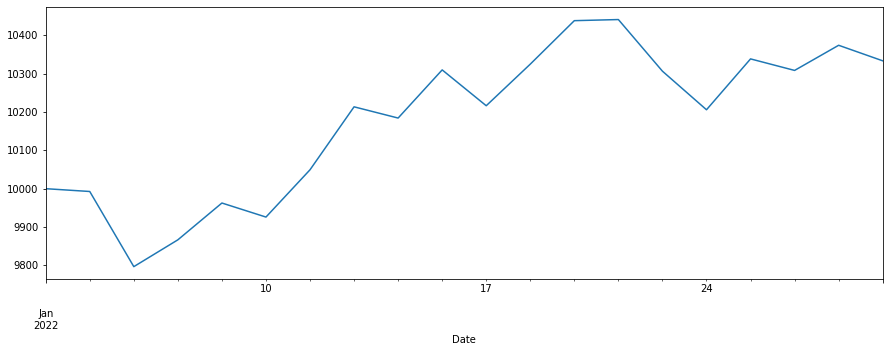

In [11]:
janeiro.plot(figsize=(15, 5))

In [12]:
print(f'Rendimento da Carteira em janeiro: R${janeiro[-1]:.2f}')
print(f'{round(((janeiro[-1] / 10000) - 1) * 100, 2)}%')

Rendimento da Carteira em janeiro: R$10333.47
3.33%


In [13]:
fevereiro = return_on_investment(month_data_frame['Fevereiro'], month='Fevereiro', start_capital=janeiro[-1])

<AxesSubplot:xlabel='Date'>

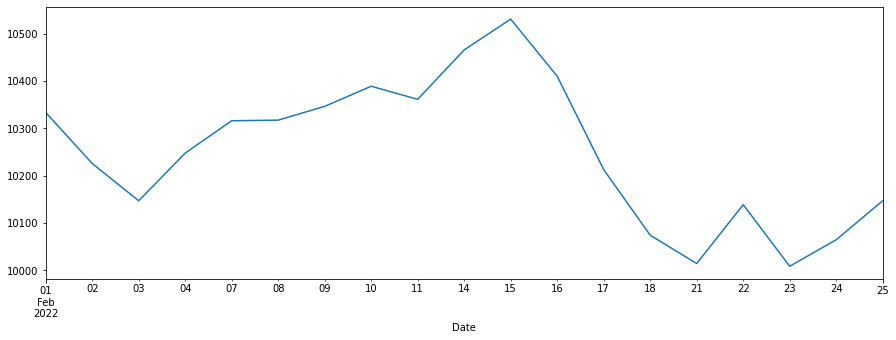

In [14]:
fevereiro.plot(figsize=(15, 5))

In [15]:
print(f'Rendimento da Carteira em fevereiro: R${fevereiro[-1]:.2f}')
print(f'{round(((fevereiro[-1] / janeiro[-1]) - 1) * 100, 2)}%')

Rendimento da Carteira em fevereiro: R$10146.84
-1.81%


In [16]:
marco = return_on_investment(month_data_frame['Março'], month='Março', start_capital=fevereiro[-1])

<AxesSubplot:xlabel='Date'>

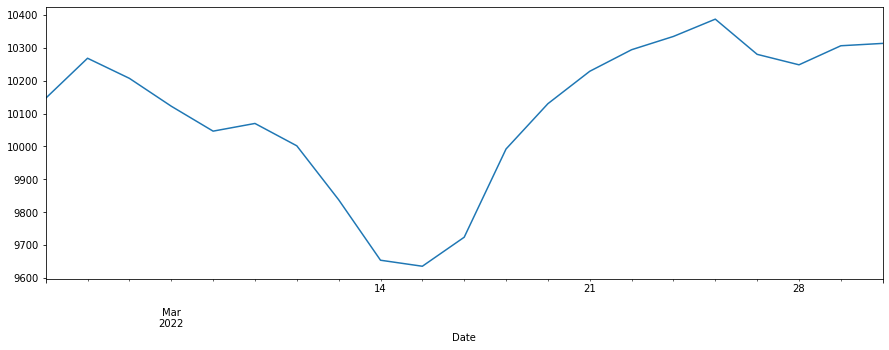

In [17]:
marco.plot(figsize=(15, 5))

In [18]:
print(f'Rendimento da Carteira em março: R${marco[-1]:.2f}')
print(f'{round(((marco[-1] / fevereiro[-1]) - 1) * 100, 2)}%')

Rendimento da Carteira em março: R$10313.81
1.65%


In [19]:
abril = return_on_investment(month_data_frame['Abril'], month='Abril', start_capital=marco[-1])

<AxesSubplot:xlabel='Date'>

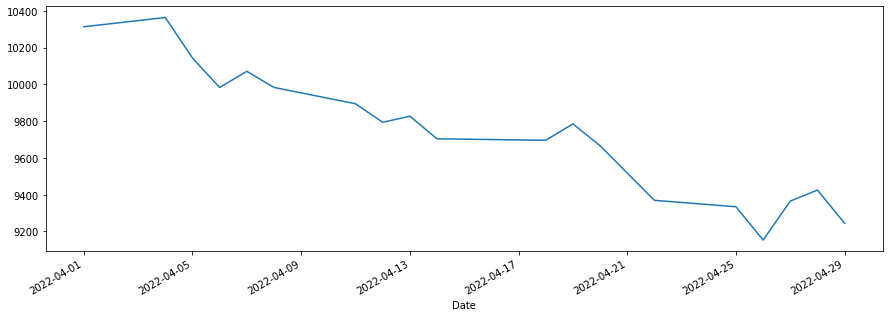

In [20]:
abril.plot(figsize=(15, 5))

In [21]:
print(f'Rendimento da Carteira em abril: R${abril[-1]:.2f}')
print(f'{round(((abril[-1] / marco[-1]) - 1) * 100, 2)}%')

Rendimento da Carteira em abril: R$9244.39
-10.37%
